In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from utils import make_confusion_matrix, plot_metrics, get_features, atomic_benchmark_estimator

import tensorflow as tf

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline


In [46]:
df = pd.read_csv("./data/Notebook 2 Data/data.csv")
df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,DEBT,PHYEX,SMOKE,DRINK,ILLNESS,PREMED,EATDIS,AVGSLP,INSOM,TSSN,WRKPRE,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,No,Sometimes,No,Yes,No,No,No,More than 8 hours,No,2-4 hours a day,No Pressure,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,No,Never,No,No,No,No,No,6 hours,Yes,5-7 hours a day,Moderate,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,No,Never,No,No,No,No,No,8 hours,No,8-10 hours a day,Mild,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,No,Sometimes,No,No,No,No,No,7 hours,No,2-4 hours a day,Severe,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,No,Never,No,No,No,Yes,No,7 hours,Yes,5-7 hours a day,Mild,Yes,Yes,No,No,No,No,Yes,Yes,No,1


In [47]:
df["DEPRESSED"].value_counts()

DEPRESSED
1    397
0    207
Name: count, dtype: int64

In [48]:
categorical_cols, numerical_cols, _ = get_features(df)

In [49]:
len(categorical_cols), len(numerical_cols)

(30, 1)

In [50]:
for cat in categorical_cols:
    en = LabelEncoder()
    en.fit(df[cat])
    print(cat, list(en.classes_))
    df[cat] = en.transform(df[cat])

AGERNG ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']
GENDER ['Female', 'Male']
EDU ['Graduate', 'HSC', 'Post Graduate', 'SSC']
PROF ['Businessman', 'Other', 'Service holder (Government)', 'Service holder (Private)', 'Student', 'Unemployed']
MARSTS ['Divorced', 'Married', 'Unmarried']
RESDPL ['City', 'Town', 'Village']
LIVWTH ['With Family', 'Without Family']
ENVSAT ['No', 'Yes']
POSSAT ['No', 'Yes']
FINSTR ['No', 'Yes']
DEBT ['No', 'Yes']
PHYEX ['Never', 'Regularly', 'Sometimes']
SMOKE ['No', 'Yes']
DRINK ['No', 'Yes']
ILLNESS ['No', 'Yes']
PREMED ['No', 'Yes']
EATDIS ['No', 'Yes']
AVGSLP ['5 hours', '6 hours', '7 hours', '8 hours', 'Below 5 hours', 'More than 8 hours']
INSOM ['No', 'Yes']
TSSN ['2-4 hours a day', '5-7 hours a day', '8-10 hours a day', 'Less than 2 hours', 'More than 10 hours a day']
WRKPRE ['Mild', 'Moderate', 'No Pressure', 'Severe']
ANXI ['No', 'Yes']
DEPRI ['No', 'Yes']
ABUSED ['No', 'Yes']
CHEAT ['No', 'Yes']
THREAT ['No'

In [51]:
df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,DEBT,PHYEX,SMOKE,DRINK,ILLNESS,PREMED,EATDIS,AVGSLP,INSOM,TSSN,WRKPRE,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,2,0,2,5,2,1,0,1,1,0,0,2,0,1,0,0,0,5,0,0,2,1,0,0,0,0,0,0,1,0,0
1,2,1,2,3,2,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1
2,1,1,1,4,2,0,0,1,1,0,0,0,0,0,0,0,0,3,0,2,0,1,1,0,0,0,0,0,0,0,0
3,0,1,1,4,2,0,0,0,1,0,0,2,0,0,0,0,0,2,0,0,3,1,1,0,1,0,0,0,0,0,1
4,1,1,0,4,2,1,0,0,1,1,0,0,0,0,0,1,0,2,1,1,0,1,1,0,0,0,0,1,1,0,1


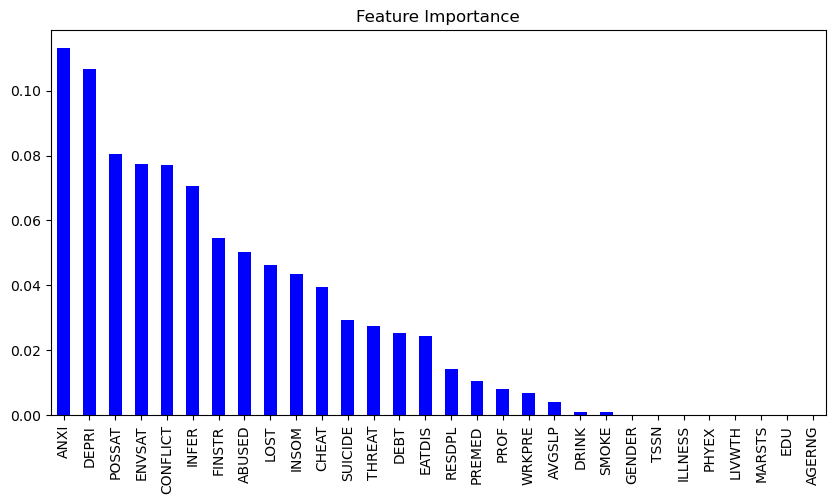

In [52]:
features = df.drop("DEPRESSED", axis=1)

mutual_info = mutual_info_classif(features, df["DEPRESSED"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns
plt.figure(figsize=(10, 5))
mutual_info.sort_values(ascending=False).plot.bar(color="b")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()

In [53]:
target = df['DEPRESSED']
X_train, X_valid, y_train, y_valid = train_test_split(
    df, target, test_size=0.2, stratify=target, random_state=99)

X_train = X_train.drop(['DEPRESSED'], axis=1)
X_valid = X_valid.drop(['DEPRESSED'], axis=1)

In [54]:
import numpy as np

# If it's a DataFrame, convert it
X_train_np = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train

# Normalize correctly
process = tf.keras.layers.Normalization()
process.adapt(X_train_np)


In [55]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices(
    (X_valid, y_valid)).batch(128).prefetch(tf.data.AUTOTUNE)

In [56]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
METRICS = ["acc"]
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='acc', patience=10, restore_best_weights=True, mode="max")


In [57]:
tf.random.set_seed(222)

input = tf.keras.layers.Input(shape=(30, ))
x = process(input)
# x = tf.keras.layers.Dense(28, activation="relu")(x)
x = tf.keras.layers.Dense(24, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
x = tf.keras.layers.Dense(4, activation="relu")(x)
x = tf.keras.layers.Dense(2, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

nn_1 = tf.keras.Model(input, output)

nn_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=METRICS
)
# nn_1.summary()
history_1 = nn_1.fit(
    train_dataset,
    epochs=500,
    validation_data=valid_dataset,
    # callbacks=[early_stopping],
    verbose=2
)

Epoch 1/500
4/4 - 1s - 372ms/step - acc: 0.5217 - loss: 0.6994 - val_acc: 0.5537 - val_loss: 0.6980
Epoch 2/500
4/4 - 0s - 7ms/step - acc: 0.6232 - loss: 0.6946 - val_acc: 0.5950 - val_loss: 0.6956
Epoch 3/500
4/4 - 0s - 7ms/step - acc: 0.6522 - loss: 0.6917 - val_acc: 0.6033 - val_loss: 0.6940
Epoch 4/500
4/4 - 0s - 9ms/step - acc: 0.6812 - loss: 0.6899 - val_acc: 0.6281 - val_loss: 0.6929
Epoch 5/500
4/4 - 0s - 9ms/step - acc: 0.6915 - loss: 0.6881 - val_acc: 0.6281 - val_loss: 0.6923
Epoch 6/500
4/4 - 0s - 9ms/step - acc: 0.7060 - loss: 0.6862 - val_acc: 0.6364 - val_loss: 0.6916
Epoch 7/500
4/4 - 0s - 7ms/step - acc: 0.7226 - loss: 0.6841 - val_acc: 0.6364 - val_loss: 0.6910
Epoch 8/500
4/4 - 0s - 8ms/step - acc: 0.7329 - loss: 0.6820 - val_acc: 0.6529 - val_loss: 0.6900
Epoch 9/500
4/4 - 0s - 9ms/step - acc: 0.7453 - loss: 0.6799 - val_acc: 0.6860 - val_loss: 0.6881
Epoch 10/500
4/4 - 0s - 10ms/step - acc: 0.7536 - loss: 0.6776 - val_acc: 0.7190 - val_loss: 0.6846
Epoch 11/500
4/4

In [58]:
y_pred = nn_1.predict(X_valid).squeeze()
y_pred = tf.where(y_pred > 0.5, 1, 0)
y_pred = y_pred.numpy()
y_pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


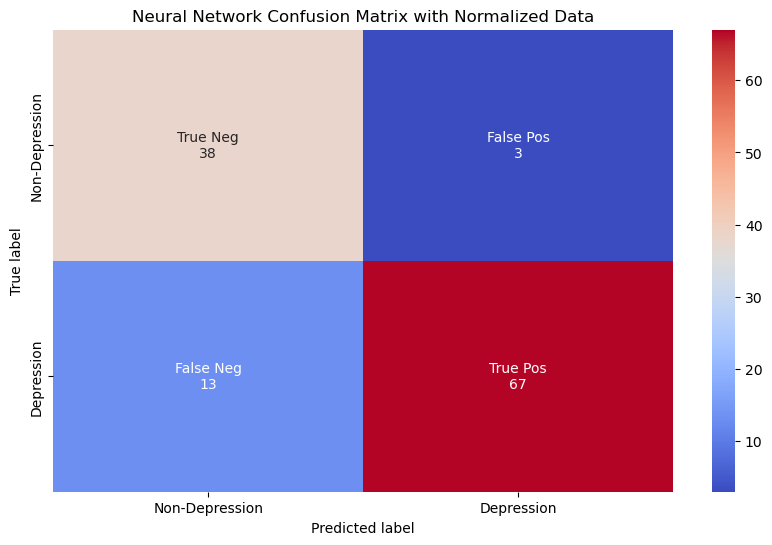

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Predict
y_pred = nn_1.predict(X_valid).squeeze()
y_pred = tf.where(y_pred > 0.5, 1, 0)
y_pred = y_pred.numpy()

# Confusion Matrix
cf = confusion_matrix(y_valid, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))

# Optional: measure model runtime if function is defined
# runtimes = atomic_benchmark_estimator(nn_1, pd.DataFrame(X_valid))

# Custom labels (edit if needed)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Non-Depression', 'Depression']

# Plot Confusion Matrix
def make_confusion_matrix(cf, group_names=None, categories='auto', cmap='Blues', figsize=(10,7), title='Confusion Matrix'):
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    
    if group_names and len(group_names) == cf.size:
        labels_text = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
    else:
        labels_text = [f"{count}" for count in group_counts]
        
    labels_matrix = np.asarray(labels_text).reshape(cf.shape[0], cf.shape[1])

    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=labels_matrix, fmt='', cmap=cmap, xticklabels=categories, yticklabels=categories)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Show the matrix
make_confusion_matrix(
    cf,
    group_names=labels,
    categories=categories,
    cmap='coolwarm',
    figsize=(10, 6),
    title="Neural Network Confusion Matrix with Normalized Data"
)


In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plot_metrics(history_1)

In [61]:
nn_1.save("model.h5")

In [62]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model.h5 model/

2025-04-09 15:49:09.804277: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 15:49:11.176571: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need 

In [63]:
import numpy as np

# Input data as a NumPy array, reshape to (1, 30) for a single sample with 30 features
input_data = np.array([
    2, 1, 2, 3, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 1, 0, 0,
]).reshape(1, -1)  # Reshape to 2D array with shape (1, 30)

# Make the prediction
prediction = nn_1.predict(input_data)

# Display the prediction
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[[0.8400959]]
